In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('WhatsgoodlyData-10.csv')

In [0]:
df.head()

,Question,Segment Type,Segment Description,Answer,Count,Percentage
0,You open ur phone and have a notif badge on in...,Mobile,Mobile respondents,Instagram,2559,0.273
1,You open ur phone and have a notif badge on in...,Mobile,Mobile respondents,Facebook,1182,0.126
2,You open ur phone and have a notif badge on in...,Mobile,Mobile respondents,Snapchat,5423,0.579
3,You open ur phone and have a notif badge on in...,Mobile,Mobile respondents,Linkedin,210,0.022
4,You open ur phone and have a notif badge on in...,Web,Web-based respondents,Instagram,30,0.256


In [0]:
#reduce, filter the 'Segment Description' column

df['Segment Description'].value_counts()

In [0]:
#only keeping the respondents who identified as students

df1 = df[df['Segment Description'].str.contains('University')]
df1['Segment Description'].value_counts()

In [0]:
#only keeping the respondents who indicated their sexual orientations

df2 = df[df['Segment Description'].str.contains('Sexual')]

print(df2.Count.sum(),'respondants indicated their sexual orientations.')
df2['Segment Description'].value_counts()

1098 respondants indicated their sexual orientations.


Sexual orientation? Gay         4
Sexual orientation? Straight    4
Sexual orientation? Confused    4
Sexual orientation? Bi          4
Name: Segment Description, dtype: int64

In [0]:
#only keeping respondents who identified as LGBTQ

df2 = df2[df2['Segment Description'].str.contains('Straight')==False]
df2['Segment Description'].value_counts()

Sexual orientation? Confused    4
Sexual orientation? Gay         4
Sexual orientation? Bi          4
Name: Segment Description, dtype: int64

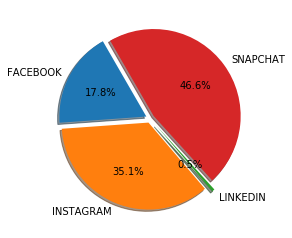

In [0]:
# creating a pie chart reprensenting the popularity rates of social media 
# platforms among LGBT respondents. 46.6% of this sample designated Snapchat 
# as their favorite platform

rates = df2.groupby('Answer')[['Percentage']].mean()
rates.Percentage = rates.Percentage.apply(lambda x : round(x*100,1))
answers = rates['Percentage'].tolist()
  
def sd(x):
  return x*100  

percentages = [round((sd(x)),0) for x in answers]
percentages = [x for x in percentages if x != 0]
labels=['FACEBOOK','INSTAGRAM','LINKEDIN','SNAPCHAT']
sizes=percentages
explode=(0.05,0.05,0.1, 0.05)
fig1,ax1=plt.subplots()
ax1.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,startangle=120)
plt.show()

In [0]:
#selected respondents whose descriptions included a special character
df3 = df[df['Segment Description'].str.contains('\?')]
df3['Segment Description'].value_counts()

is your age? 31-34                      4
your parents make?  $50K-$90K           4
Are you? None/Other                     4
you vote for? Hillary Clinton           4
What's your leaning? Liberal 🔷          4
I'm in? College                         4
What's your leaning? In-between         4
Mac or PC? PC 💻                         4
Mac or PC? Other 🐧                      4
is your age? 35 or older                4
you vote for? Didn't vote               4
Are you? Christian                      4
your parents make?  < $50K              4
I'm in? Other                           4
Mac or PC? Mac 🖥                        4
you vote for? Other                     4
closely identify as? Black              4
closely identify as? Other              4
Are you? Muslim                         4
closely identify as? Asian              4
is your age? 25-30                      4
What's your leaning? Conservative 🐘     4
closely identify as? White              4
is your age? 18-24                

In [0]:
#only keeping the descriptions related to the respondents' household incomes

df4 = df[df['Segment Description'].str.contains('\$')]

In [0]:
#using lambda function to replace values and create classification useful for the next step
df4.Percentage = df4.Percentage.apply(lambda x : x*100)
df4['Segment Description']=df4['Segment Description'].apply(lambda x: np.where('< $5' in x,'a - below $50K',x))
df4['Segment Description']=df4['Segment Description'].apply(lambda x: np.where('-$9' in x,'b - $50K to $90K',x))
df4['Segment Description']=df4['Segment Description'].apply(lambda x: np.where('-$2' in x,'c - $90K to $240K',x))
df4['Segment Description']=df4['Segment Description'].apply(lambda x: np.where('> $2' in x,'d - above $240K',x))

In [0]:
def selection(y):
  x = pd.DataFrame(columns = {y})
  x[y] = df4.Percentage[df4.Answer == y]
  x['Class']=df4['Segment Description'][df4.Answer == y]
  x.reset_index(inplace=True)
  x.drop('index',axis=1,inplace=True)
  return x
  

In [0]:
df5=selection('Facebook')
df6=selection('Snapchat')
df7=selection('Instagram')
df8=selection('Linkedin')

In [0]:
df9 = pd.merge(df5,df6, on='Class',how='left')
df9 = pd.merge(df9,df7,on='Class', how='left')
df9 = pd.merge(df9,df8,on='Class',how='left')
df9
# creating a new dataframe to visualize the respondents' social media preferences 
# clustered by their household income.

,Facebook,Class,Snapchat,Instagram,Linkedin
0,18.6,c - $90K to $240K,55.7,21.7,4.1
1,10.4,a - below $50K,62.0,24.5,3.1
2,18.6,d - above $240K,47.9,28.9,4.6
3,11.0,b - $50K to $90K,57.4,30.0,1.5


In [0]:
df9["new"] = range(1,len(df9)+1)
df9.ix[1,'new'] = 0
df9.ix[2,'new'] = 3
df9.ix[0,'new'] = 2
df9.ix[3,'new'] = 1
df9=df9.sort_values("new")#.drop('new', axis=1)


In [0]:
df9.drop('new',axis=1,inplace=True)
df9.reset_index(inplace=True)
df9.drop('index',axis=1,inplace=True)

In [0]:
df9

# "cosmectic" modification to sort income clusters from the lowest income group to the highest

,Facebook,Class,Snapchat,Instagram,Linkedin
0,10.4,a - below $50K,62.0,24.5,3.1
1,11.0,b - $50K to $90K,57.4,30.0,1.5
2,18.6,c - $90K to $240K,55.7,21.7,4.1
3,18.6,d - above $240K,47.9,28.9,4.6


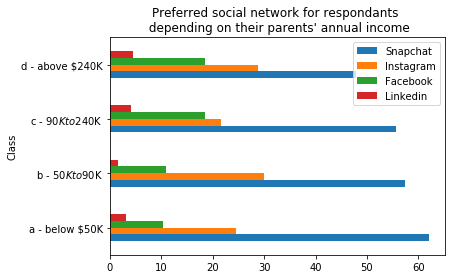

In [0]:
df9[['Snapchat','Instagram','Facebook','Linkedin','Class']].groupby(['Class']).agg('mean').plot.barh()
plt.title('Preferred social network for respondants \n depending on their parents\' annual income')
plt.show()

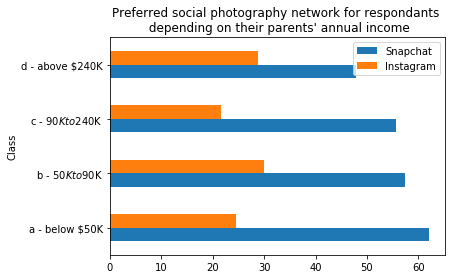

In [0]:
df9[['Class','Snapchat','Instagram']].groupby(['Class']).agg('mean').plot.barh()
plt.title('Preferred social photography network for respondants \n depending on their parents\' annual income')
plt.show()

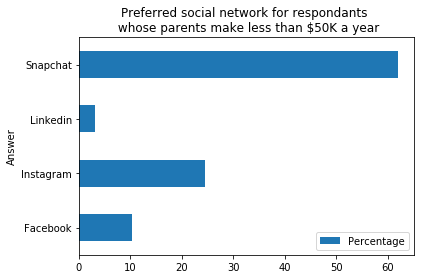

In [0]:
# results are given in percentage

below50 = df4[df4['Segment Description']=='a - below $50K']
below50[['Answer','Percentage']].groupby(['Answer']).agg('mean').plot.barh()
plt.title('Preferred social network for respondants \n whose parents make less than $50K a year')
plt.show()

In [0]:
#among all the respondents who identied as currently enrolled in a US university,
# only keeping 3 relevant columns about social network preferences

df11 = df1[['Answer','Count','Percentage']]

In [0]:
# aggretating all of the answers for each social media platform to get the total count and percentage
# the percentage figures take into account people who responded nothing, which gives an unprecise result
#more cleaning is needed for df11
df12 = df11.groupby('Answer')[['Count']].sum()
df12['Percentage']= df11.groupby('Answer')[['Percentage']].mean()
df12.Percentage = df12.Percentage.apply(lambda x : round(x*100,1))
df12

,Count,Percentage
Answer,,
Facebook,332,17.5
Instagram,472,27.6
Linkedin,70,4.8
Snapchat,933,50.0


In [0]:
df11 = df11[(df11.Percentage!=0) & (df11.Percentage!=1)]
df11.shape

#from 256 rows to 110 rows, by removing all of the Universities that had corrupt data
# (unsually only 1 or 2 respondents)

(110, 3)

In [0]:
df13 = df11.groupby('Answer')[['Count']].sum()
df13['Percentage']= df11.groupby('Answer')[['Percentage']].mean()
df13.Percentage = df13.Percentage.apply(lambda x : round(x*100,1))
df13

,Count,Percentage
Answer,,
Facebook,324,18.0
Instagram,461,26.5
Linkedin,68,5.0
Snapchat,916,53.4


In [0]:
# among whom is Facebook the most popular ?

df14 = df[df.Answer=='Facebook']
df14=df14[(df14.Percentage!=1) & (df14.Percentage!=0)]
# got rid of corrupt results
df14 = df14.sort_values('Percentage',ascending=False)
df14.Percentage = df14.Percentage.apply(lambda x : x*100)
df14.head()
#Facebook is especially popular in Minnesota, but I want to know where Facebook is popular 
#when we don't consider the respondents' universities

,Question,Segment Type,Segment Description,Answer,Count,Percentage
265,You open ur phone and have a notif badge on in...,University,University of Minnesota,Facebook,1,50.0
381,You open ur phone and have a notif badge on in...,Custom,is your age? 35 or older,Facebook,1,50.0
25,You open ur phone and have a notif badge on in...,University,Johns Hopkins University,Facebook,14,36.8
437,You open ur phone and have a notif badge on in...,Custom,Are you? Jewish,Facebook,32,35.2
401,You open ur phone and have a notif badge on in...,Custom,is your age? 25-30,Facebook,2,33.3


In [0]:
df15 = df14[(df14['Segment Description'].str.contains('University')==False)
            &(df14['Segment Description'].str.contains('College')==False)
           &(df14.Count>9)]
df15.head(7)
#keeping the 7 criteria for which Facebook is the most popular social media platform
# for at least 25% of the respondents, with a minimum of 10 respondents
# so that the results are meaningful

,Question,Segment Type,Segment Description,Answer,Count,Percentage
437,You open ur phone and have a notif badge on in...,Custom,Are you? Jewish,Facebook,32,35.2
5,You open ur phone and have a notif badge on in...,Web,Web-based respondents,Facebook,32,27.4
373,You open ur phone and have a notif badge on in...,Custom,Graduation Year 2018,Facebook,48,26.4
497,You open ur phone and have a notif badge on in...,Custom,closely identify as? Asian,Facebook,28,23.9
485,You open ur phone and have a notif badge on in...,Custom,Graduation Year 2017,Facebook,25,21.6
349,You open ur phone and have a notif badge on in...,Custom,you vote for? Hillary Clinton,Facebook,121,21.2
365,You open ur phone and have a notif badge on in...,Custom,I'm in? Post-grad,Facebook,74,20.9


In [0]:
# now, comparing the results for Jewish respondents with all of the other respondents'
# results. According to the table above, it seems Facebook is especially popular 
# among Jewish people.

df35 = df[df['Segment Description'].str.contains('ewi')]
df35.Percentage = df35.Percentage.apply(lambda x : round(x*100,1))
df35['Segment Description'] = df35['Segment Description'].apply(lambda x : '1 - Jewish respondants')

In [0]:
df36 = df[df['Segment Description'].str.contains('ewi')==False]
df36 = df36[df36.Count>9]
df36.Percentage = df36.Percentage.apply(lambda x : round(x*100))

In [0]:
def selection2(y):
  x = pd.DataFrame(columns = {y})
  x[y] = df35.Percentage[df35.Answer == y]
  x['Class']=df35['Segment Description'][df35.Answer == y]
  x.reset_index(inplace=True)
  x.drop('index',axis=1,inplace=True)
  return x

def selection3(y):
  x = pd.DataFrame(columns = {y})
  x[y] = df36.Percentage[df36.Answer == y]
  x['Class']=df36['Segment Description'][df36.Answer == y]
  x.reset_index(inplace=True)
  x.drop('index',axis=1,inplace=True)
  return x

df37=selection2('Facebook')
df38=selection2('Snapchat')
df39=selection2('Instagram')
df40=selection2('Linkedin')
df41 = pd.merge(df37,df38, on='Class',how='left')
df41 = pd.merge(df41,df39,on='Class', how='left')
df41 = pd.merge(df41,df40,on='Class',how='left')


In [0]:
df42=selection3('Facebook')
df43=selection3('Snapchat')
df44=selection3('Instagram')
df45=selection3('Linkedin')
df46 = pd.merge(df42,df43, on='Class',how='left')
df46 = pd.merge(df46,df44,on='Class', how='left')
df46 = pd.merge(df46,df45,on='Class',how='left')
df46 = df46.groupby('Class').agg('mean')
df46.reset_index(inplace=True)

In [0]:
df46.Class = df46.Class.apply(lambda x : '0 - Overall population')
df47=df41.append(df46)

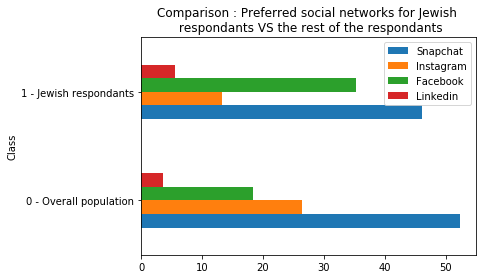

In [0]:
df47[['Snapchat','Instagram','Facebook','Linkedin','Class']].groupby(['Class']).agg('mean').plot.barh()
plt.title('Comparison : Preferred social networks for Jewish \n respondants VS the rest of the respondants')
plt.show()